# Python API examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
import requests
url = 'https://blocmarket.herokuapp.com/createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

url = 'https://blocmarket.herokuapp.com/createMarket'
headers = {'content-type': 'application/json'}
content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
 {'allChecks': 
     "{'marketId': '1', 'marketRangeChk': True,
     'sigChk': True, 'chainChk': True, 
     'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0,
 'marketMin': 1,
 'marketRootId': 1,
 'traderId': 2}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = 'https://blocmarket.herokuapp.com/createTrade'
headers = {'content-type': 'application/json'}
content_maketrade = {"signingKey_hex": sk,
                     "traderId": int(tId),
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)



~~~~

Example return as json:
~~~~


{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = 'https://blocmarket.herokuapp.com/viewMarketBounds'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},
"marketRootId":{"0":1,"1":2,"2":3,"3":4},
"marketBranchId":{"0":1,"1":1,"2":1,"3":1},
"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},
"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = 'https://blocmarket.herokuapp.com/viewOrderBook'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},
"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},
"iMatched":{"0":true,"1":true,"2":true},
"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},
"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},
"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},
"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":
{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = 'https://blocmarket.herokuapp.com/viewMatchedTrades'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = 'https://blocmarket.herokuapp.com/viewTradeSummary'
headers = {'content-type': 'application/json'}
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},
"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},
"iMatched":{"0":false,"1":true},
"timeStampUTC":{"0":1547982939316,"1":1547982938964},
"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [129]:
baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
# baseurl = 'http://127.0.0.1:7000/'

In [130]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [131]:
# View response as json
response.json()

{'signingKey_hex': 'e8502ecf19349e72b292058b40f22593c0cba7e64b2f1d0036affdece8ab06f2',
 'traderId': '1',
 'verifyKey_hex': '86b49cee38a787c17d0c2c7707919d500ea1b0d08041276ef28db0b2d9d75c41'}

In [132]:
# Create a new market
url = baseurl + 'createMarket'

mkRtId = 7
mkId=1
# Copy keys and traderid from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

content_makemarket = {"signingKey_hex": sk,
                    "traderId": int(tId), 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0.1,
                    "marketMax":0.9}
# Post market
response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)


In [133]:
# View response as json
response.json()

{'allChecks': "{'marketId': '1', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.9,
 'marketMin': 0.1,
 'marketRootId': 7,
 'traderId': 1}

In [134]:
# Save market id from response
mkId = response.json()['marketId']

In [135]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": int(tId),
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [136]:
# View response as json
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}

In [137]:
# View response as a dataframe
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'marketChk': True, 'sigChk': True, 'chainChk'...",True,1,0.55,1,1


In [138]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [139]:
# View
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': 1}

In [140]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 6.177724838256836 seconds.
matched trade: 1 in 21.089619159698486 seconds.
matched trade: 2 in 13.85325288772583 seconds.
matched trade: 3 in 19.98750400543213 seconds.
matched trade: 4 in 22.247538805007935 seconds.


In [141]:
# Create many markets
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

market created: 1 in 9.230908870697021 seconds.
market created: 2 in 14.346924781799316 seconds.
market created: 3 in 8.701639890670776 seconds.
market created: 4 in 17.24790930747986 seconds.


In [142]:
response.json()

{'allChecks': "{'marketId': '5', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 5,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 1}

In [143]:
# View maximum and minimum of each market
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [109]:
pd.read_json(response.json())


,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,7,1,0.1,0.9
1,2,1,1,0.0,0.7
2,3,2,1,0.0,0.7
3,4,3,1,0.0,0.7
4,5,4,1,0.0,0.7


In [127]:
# View whole order book
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [144]:
pd.read_json(response.json())


,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,7,1,0.1,0.9
1,2,1,1,0.0,0.7
2,3,2,1,0.0,0.7
3,4,3,1,0.0,0.7
4,5,4,1,0.0,0.7


In [145]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 12.530750274658203 seconds.
unmatched trade: 1 in 1.5163986682891846 seconds.
unmatched trade: 2 in 1.6589088439941406 seconds.
unmatched trade: 3 in 2.309812068939209 seconds.
unmatched trade: 4 in 9.975372076034546 seconds.


In [146]:
a = response.json()
a

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': 1}

In [150]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [151]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
12,1,0.43,-1,1,2019-01-28 03:41:35.657
13,1,0.43,-1,1,2019-01-28 03:41:37.179
14,1,0.43,-1,1,2019-01-28 03:41:38.825
15,1,0.43,-1,1,2019-01-28 03:41:41.161
16,1,0.43,-1,1,2019-01-28 03:41:51.094


In [152]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [153]:
response.json()
#nopinkie

'{"marketId":{"0":1},"price":{"0":0.55},"quantity":{"0":0.0},"traderId":{"0":1}}'

In [156]:
pd.read_json(response.json())

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [155]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 19.489779233932495 seconds.
matched trade: 1 in 4.152652978897095 seconds.
matched trade: 2 in 21.424638986587524 seconds.
matched trade: 3 in 21.37457013130188 seconds.
matched trade: 4 in 20.939950704574585 seconds.


In [158]:
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [159]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,1,1,True,2019-01-28 03:33:45.747,0.1,0.9,-0.45,0.35
1,1,0.55,-1,1,True,2019-01-28 03:34:07.257,0.1,0.9,0.45,-0.35
10,1,0.55,-1,1,True,2019-01-28 03:35:22.922,0.1,0.9,0.45,-0.35
11,1,0.55,1,1,True,2019-01-28 03:35:34.834,0.1,0.9,-0.45,0.35
12,1,0.43,-1,1,False,2019-01-28 03:43:25.684,0.1,0.9,0.33,-0.47
13,1,0.43,-1,1,True,2019-01-28 03:41:35.657,0.1,0.9,0.33,-0.47
14,1,0.43,1,1,True,2019-01-28 03:43:33.961,0.1,0.9,-0.33,0.47
15,1,0.43,-1,1,False,2019-01-28 03:43:35.773,0.1,0.9,0.33,-0.47
16,1,0.43,-1,1,True,2019-01-28 03:41:37.179,0.1,0.9,0.33,-0.47
17,1,0.43,1,1,True,2019-01-28 03:43:38.072,0.1,0.9,-0.33,0.47


In [160]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [161]:
response.json()

{'timeStampUTC': '2019-01-28 03:45:20.790806',
 'timeStampUTCSignature': "b'\\x8fD\\x8b\\xab_\\x01[\\xf1\\x18\\xfa\\x8c\\xf2\\xcf}a\\xc8\\x19\\xd7>c\\x86\\xfaZ\\x13!i\\x13I\\rU\\x94\\xfb\\xb5v\\x19[~\\x85\\x98\\xd7W\\xe3R\\xd8\\x07\\xe8\\x9d>\\x9b\\xbe#\\r\\xdd\\x04\\xb9\\x8f\\x08b\\xfe\\xa3\\xbc\\xb3\\x15\\x04'",
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [ ]:
# A simple bot with an OU process

url = baseurl+'createTrade'

m = 0.5
k = 0.01
v = 0.05
B = m

for i in range(20):
    # Create bounded [0,1] random reverting to m
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price: ' + str(content_maketrade['price']))

Price: 0.477695212934009
Price: 0.4571036261959427
Price: 0.45736783250335356


In [77]:

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,7,0.550000,1,3,True,2019-01-28 02:17:59.883,0.1,0.9,-0.450000,0.350000
1,7,0.550000,-1,3,True,2019-01-28 02:18:12.420,0.1,0.9,0.450000,-0.350000
10,7,0.550000,-1,3,True,2019-01-28 02:18:33.106,0.1,0.9,0.450000,-0.350000
100,7,0.811638,-1,3,True,2019-01-28 02:19:34.739,0.1,0.9,0.711638,-0.088362
101,7,0.831638,-1,3,True,2019-01-28 02:19:34.555,0.1,0.9,0.731638,-0.068362
102,7,0.831638,1,3,True,2019-01-28 02:19:34.830,0.1,0.9,-0.731638,0.068362
103,7,0.849769,1,3,True,2019-01-28 02:19:34.905,0.1,0.9,-0.749769,0.050231
104,7,0.849769,-1,3,True,2019-01-28 02:19:35.149,0.1,0.9,0.749769,-0.050231
105,7,0.869769,-1,3,True,2019-01-28 02:19:34.973,0.1,0.9,0.769769,-0.030231
106,7,0.869769,1,3,True,2019-01-28 02:19:35.223,0.1,0.9,-0.769769,0.030231


In [78]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-01-28 02:17:59.883,7,0.550000,1,3,True,2019-01-28 02:17:59.883,0.1,0.9,-0.450000,0.350000
2019-01-28 02:18:12.420,7,0.550000,-1,3,True,2019-01-28 02:18:12.420,0.1,0.9,0.450000,-0.350000
2019-01-28 02:18:33.106,7,0.550000,-1,3,True,2019-01-28 02:18:33.106,0.1,0.9,0.450000,-0.350000
2019-01-28 02:19:34.739,7,0.811638,-1,3,True,2019-01-28 02:19:34.739,0.1,0.9,0.711638,-0.088362
2019-01-28 02:19:34.555,7,0.831638,-1,3,True,2019-01-28 02:19:34.555,0.1,0.9,0.731638,-0.068362
2019-01-28 02:19:34.830,7,0.831638,1,3,True,2019-01-28 02:19:34.830,0.1,0.9,-0.731638,0.068362
2019-01-28 02:19:34.905,7,0.849769,1,3,True,2019-01-28 02:19:34.905,0.1,0.9,-0.749769,0.050231
2019-01-28 02:19:35.149,7,0.849769,-1,3,True,2019-01-28 02:19:35.149,0.1,0.9,0.749769,-0.050231
2019-01-28 02:19:34.973,7,0.869769,-1,3,True,2019-01-28 02:19:34.973,0.1,0.9,0.769769,-0.030231


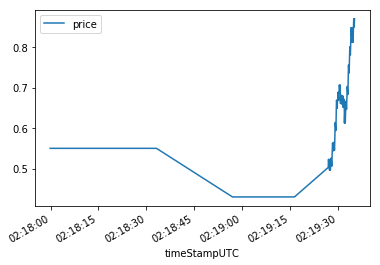

In [79]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl API examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://blocmarket.herokuapp.com/data 
~~~~


# Matlab
TODO

# Powershell

TODO


    

# Setup for release

- Get extra database rows on Heroku
- Single 